## Enhancing Mortality Prediction in Children with Pediatric Severe Febrile Illness: Integration of Biomarkers with Clinical Severity Scores 

### Introduction 

Severe febrile illness remains one of the leading causes of childhood mortality, particularly in low and middle income countries. While many cases are due to self-limited infections, there is a small yet critical percentage of children that develop life-threatening infections that require immediate medical attention. Despite the treatment advancements, identifying children at early risk of severe complications remains a challenge. Oftentimes, children with severe febrile disease experience nonspecific symptoms, making it hard to differentiate children who need urgent intervention from those with self-limiting infections. This delay and diagnostic uncertainty contribute to the increase in mortality rates in children who suffer with severe febrile illness (Balanza, 2020).  

To address this, the present study investigates whether adding specific biomarkers to existing clinical scores, quick Sequential Organ Failure Assessment (qSOFA) and Lambaréné Organ Dysfunction (LOD) scores, can improve prediction of in-hospital mortality in children with severe febrile illness. 


### Study Design and Population 

Study Design: This prospective cohort study was conducted at Muhimbili National Hospital (MNH), the primary national referral hospital and teaching hospital for Muhimbili University of Health and Allied Sciences (MUHAS) in Dar es Salaam, Tanzania. Children aged 28 days (about 4 weeks) to 14 years presenting with severe febrile illness between July 26, 2022, and November 26, 2024, were enrolled in the study. The primary outcome of interest was in-hospital mortality.  

Variables and Measures: Clinical data, vital signs, and lab results were collected including variables needed to calculate the qSOFA and LOD scores. Serum biomarkers were measured which included IL-10, Ang-2, IL-6, IL-1ra, IL-8, sTNFR-1, Protein C, RAGE, PAI-1, ICAM-1, and sTREM-1. Because biomarker distributions were right-skewed, continuous values were log-transformed for stable modeling. 

In addition to the biomarkers, a broad set of baseline characteristics were also collected to characterize the study population: age, sex, anthropometrics (weight, height, mid-upper arm circumference), and comorbidities (HIV status, malaria, malnutrition). Continuous variables with a skewed distribution were summarized using median and interquartile range (IQR), while normally distributed variables were summarized using mean and standard deviation (SD). 

Data Preprocessing: Data was cleaned and preprocessed in Python. Patients with missing outcome data or critical predictor values were excluded. Patients with outcomes recorded as "Left AMA" or "Transferred" were categorized as survivors. 

### Data Analysis 

Statistical Analysis: 

The area under the receiver operating characteristic curve (AUC) was used to assess each biomarker’s predictive power for in-hopsital mortality, and 95% confidence intervals were calculated for each. To determine whether the biomarker added predictive value beyond the clinical scores alone, logistic regression models were fitted that combined each biomarker with either the qSOFA or LOD scores. Models were restricted to complete cases. 

In addition to computing individual AUCs, random forest (RF) and extreme gradient boosting (XGBoost) classifiers were used to assess the relative importance of each biomarker. RF was implemented using randomForest package (n = 500 trees), and XGBoost was implemented with xgboost package using binary logistic objective. The biomarkers were ranked using Gini importance (RF) and gain (XGBoost).  

This dual approach was chosen to balance clinical interpretability with statistical robustness. Individual AUCs provide straightforward measures of each biomarker’s predictive ability alone and alongside clinical scores. However, this method does not account for correlations between biomarkers, potentially causing redundancy. On the other side, RF and XGBoost are multivariate methods that capture complex, nonlinear relationships and interactions, reducing overfitting risk, though their importance scores can be less interpretable clinically and do not directly measure incremental predictive gain. So by combining these two methods ensures biomarker utility is both clinically relevant and statistically sound.   

The biomarkers that consistently ranked highly across these both approaches, both strong individual predictive power and robust multivariate importance, were selected for combination with clinical severity scores. 

Predictive performance was evaluated using 100-times repeated 10-fold cross-validation, providing robust estimates of model generalizability and minimizing partition bias. Models including clinical scores and top biomarkers were compared based on mean AUC across folds. Discrimination was assessed in three ways: (1) biomarkers alone, (2) clinical scores plus all biomarkers, and (3) clinical scores and top biomarkers. ROC curves were generated for visualization, and improvements in AUC interpreted as evidence of additive predictive value. 

In [ ]:
import pandas as pd

df = pd.read_csv('datasets/final_dataset.csv')
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

print(df.isnull().sum())


(444, 47)
Index(['record_id', 'subject_id', 'outcome', 'case_control',
       'malnut_mod_sev.x', 'lod___1', 'lod___2', 'lod___3', 'poct_crp_mg_dl',
       'poct_pct', 'poct_fer', 'poct_lact', 'poct_hco3', 'il6', 'il8', 'ang2',
       'rage', 'icam1', 'tnfr1', 'il10', 'il1ra', 'trem1', 'pai1', 'proc',
       'Plasma', 'malnut_mod_sev.y', 'lods_score', 'qSOFA', 'log_il10',
       'log_il6', 'log_ang2', 'log_il8', 'log_rage', 'log_icam1', 'log_tnfr1',
       'log_il1ra', 'log_pai1', 'log_proc', 'poct_fer_log', 'poct_pct_log',
       'poct_lact_log', 'poct_crp_mg_dl_log', 'log_trem1', 'poct_hco3_log',
       'age_calc', 'sex', 'hiv_co'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   record_id           444 non-null    int64  
 1   subject_id          444 non-null    int64  
 2   outcome             392 non-n

### Dataset Description

The dataset contains **444 pediatric patient records** presenting with severe febrile illness. It includes **47 variables** encompassing clinical scores, biomarker measurements, demographic data, and patient identifiers. The primary objective is to predict **in-hospital mortality** (`outcome`) using these features.

#### Input Features
- **Clinical Scores:**  
  - Quick Sequential Organ Failure Assessment (**qSOFA**)  
  - Lambaréné Organ Dysfunction (**LOD**) scores (`lod___1`, `lod___2`, `lod___3`, `lods_score`)  

- **Biomarkers:**  
  - Inflammatory markers such as C-reactive protein (`poct_crp_mg_dl`), lactate (`poct_lact`), interleukins (`il6`, `il8`, `il10`, `il1ra`), angiopoietin-2 (`ang2`), RAGE receptor (`rage`), ICAM-1 (`icam1`), TNF receptor 1 (`tnfr1`), TREM1, PAI1, and procalcitonin (`proc`).  
  - Log-transformed versions of many biomarkers are included (e.g., `log_il6`, `log_ang2`).  

- **Demographics:**  
  - Age (`age_calc`)  
  - Sex (`sex`)  
  - HIV status (`hiv_co`)  

- **Nutritional status:**  
  - Moderate/severe malnutrition indicators (`malnut_mod_sev`)  

- **Identifiers:**  
  - `record_id` and `subject_id`  

#### Outcome Variable
- `outcome`: In-hospital mortality status (binary). Note that this variable has some missing values, with 392 out of 444 entries available.

#### Dataset Dimensions and Missingness
- **Number of patients (rows):** 444  
- **Number of features (columns):** 47  
- Missing data varies across variables:  
  - Mortality outcome missing in some records (392 non-null)  
  - Some biomarkers and clinical scores have missing values  
  - Demographic variables such as age, sex, and HIV status are complete  

In [ ]:
var_label_map = {
    "age_calc": "Age (months), median (IQR)",
    "qSOFA": "QSOFA score, mean (SD)",
    "lods_score": "LOD Score, mean (SD)",
    "poct_crp_mg_dl": "CRP (mg/dL), median (IQR)",
    "poct_lact": "Lactate, median (IQR)",
    "sex": "Male Sex, N (%)",
    "hiv_co": "HIV Positive, N (%)",
    "malnut_mod_sev.y": "Moderate-Severe Malnutrition, N (%)"
}

def get_var_name(row_label):
    if " = " in row_label:
        return row_label.split(" = ")[0]
    else:
        return row_label

new_index = []
last_var = None
for row in table1_clean.index:
    var = get_var_name(row)
    if var != last_var:
        new_index.append(var_label_map.get(var, var))
        last_var = var
    else:
        new_index.append("")

table1_clean = table1_clean.copy()
table1_clean.insert(0, 'Variable', new_index)

pvals = table1_clean['P-value'].copy()
last_var = None
for i, row in enumerate(table1_clean['Variable']):
    if row != "" and row != last_var:
        last_var = row
    else:
        pvals.iat[i] = ""

table1_clean['P-value'] = pvals

n_survived = df_clean[df_clean['outcome'] == 'Survived'].shape[0]
n_died = df_clean[df_clean['outcome'] == 'Died'].shape[0]
n_total = df_clean.shape[0]

table1_clean.columns = [
    f"Total (N={n_total})" if col == "Overall" else 
    f"Survivors (N={n_survived})" if col == "Survived" else 
    f"Non-survivors (N={n_died})" if col == "Died" else 
    col 
    for col in table1_clean.columns
]

styled_table = (
    table1_clean.style
    .set_caption("Table 1. Subject characteristics for children with severe febrile illness in Tanzania by survival status.")
    .format(na_rep="—")
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'caption',
         'props': [('caption-side', 'top'), ('font-weight', 'bold'), ('font-size', '110%')]},
        {'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('border', '1px solid #ccc'), ('padding', '6px')]}
    ])
)
styled_table


,Variable,Survivors (N=323),Non-survivors (N=69),P-value
Variable,,,,
age_calc,"Age (months), median (IQR)",35.83 (38.13),30.63 (44.89),0.320
qSOFA,"QSOFA score, mean (SD)",0.78 (0.65),1.39 (0.77),0.000
lods_score,"LOD Score, mean (SD)",0.89 (0.84),2.06 (0.82),0.000
poct_crp_mg_dl,"CRP (mg/dL), median (IQR)",6.13 (9.05),10.71 (11.62),0.000
poct_lact,"Lactate, median (IQR)",2.54 (1.81),3.98 (3.40),0.000
sex = Male,"Male Sex, N (%)",187 (57.9%),39 (56.5%),
sex = Female,,136 (42.1%),30 (43.5%),
hiv_co = No,"HIV Positive, N (%)",319 (98.8%),64 (92.8%),
hiv_co = Unknown,,2 (0.6%),0 (0.0%),


Table 1 presents the baseline characteristics of children with severe febrile illness in Tanzania, stratified by survival status (died vs survived). 

With the complete cases, the cohort included 323 survivors and 69 non-survivors. The median age (months) was slightly higher in survivors (35.8 months) compared to non-survivors (30.6 months). Severity scores including QSOFA and LOD scores were significantly elevated in non-survivors, implying clinical severity when they first arrived to the hospital. Biomarkers such as CRP and lactate levels were markedly higher in non-survivors, suggesting increased inflammation and metabolic stress. The distribution of sex was similar between groups, with males constituting about 58% of survivors and 57% of non-survivors. Most children were HIV negative, though HIV positivity was more frequent among non-survivors. Moderate to severe malnutrition was more prevalent in non-survivors (55.1%) compared to survivors (31.9%), highlighting its role as a risk factor for mortality.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

def bootstrap_auc_ci(y_true, y_scores, n_bootstraps=2000, alpha=0.05, random_seed=42):
    rng = np.random.RandomState(random_seed)
    bootstrapped_scores = []

    mask = ~np.isnan(y_scores)
    y_true = y_true[mask]
    y_scores = y_scores[mask]

    for _ in range(n_bootstraps):
        indices = rng.randint(0, len(y_scores), len(y_scores))
        if len(np.unique(y_true[indices])) < 2:
            continue
        score = roc_auc_score(y_true[indices], y_scores[indices])
        bootstrapped_scores.append(score)
    
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    
    lower = np.percentile(sorted_scores, 100 * (alpha / 2))
    upper = np.percentile(sorted_scores, 100 * (1 - alpha / 2))
    mean_score = np.mean(sorted_scores)
    
    return mean_score, lower, upper

biomarkers = [
  "log_il10", "log_ang2", "log_il6", "log_il1ra", "log_il8",
  "log_tnfr1", "log_proc", "log_rage", "log_pai1", "log_icam1",
  "log_trem1"
]

#outcome
y_true = (df_clean['outcome'] == 'Died').astype(int).values

# Biomarkers
biomarker_scores = {b: df_clean[b].values for b in biomarkers}

# Clinical scores arrays
qSOFA_scores = df_clean['qSOFA'].values
LOD_scores = df_clean['lods_score'].values

results = []

for biomarker_name, biomarker_values in biomarker_scores.items():
    # Biomarker alone
    auc, lower, upper = bootstrap_auc_ci(y_true, biomarker_values)
    
    # Biomarker + qSOFA (sum)
    combined_qSOFA = biomarker_values + qSOFA_scores
    auc_q, lower_q, upper_q = bootstrap_auc_ci(y_true, combined_qSOFA)
    
    # Biomarker + LOD (sum)
    combined_LOD = biomarker_values + LOD_scores
    auc_l, lower_l, upper_l = bootstrap_auc_ci(y_true, combined_LOD)
    
    results.append({
        "Biomarker": biomarker_name,
        "Biomarker Score Alone (95% CI)": f"{auc:.3f} ({lower:.3f}–{upper:.3f})",
        "Biomarker + qSOFA (95% CI)": f"{auc_q:.3f} ({lower_q:.3f}–{upper_q:.3f})",
        "Biomarker + LOD (95% CI)": f"{auc_l:.3f} ({lower_l:.3f}–{upper_l:.3f})"
    })

# qSOFA alone
auc_qsofa, lower_qsofa, upper_qsofa = bootstrap_auc_ci(y_true, qSOFA_scores)
results.append({
    "Biomarker": "qSOFA",
    "Biomarker Score Alone (95% CI)": f"{auc_qsofa:.3f} ({lower_qsofa:.3f}–{upper_qsofa:.3f})",
    "Biomarker + qSOFA (95% CI)": "n/a",
    "Biomarker + LOD (95% CI)": "n/a"
})

# LOD alone
auc_lod, lower_lod, upper_lod = bootstrap_auc_ci(y_true, LOD_scores)
results.append({
    "Biomarker": "LODS",
    "Biomarker Score Alone (95% CI)": f"{auc_lod:.3f} ({lower_lod:.3f}–{upper_lod:.3f})",
    "Biomarker + qSOFA (95% CI)": "n/a",
    "Biomarker + LOD (95% CI)": "n/a"
})

table2 = pd.DataFrame(results)
print(table2)


    Biomarker Biomarker Score Alone (95% CI) Biomarker + qSOFA (95% CI)  \
0    log_il10            0.711 (0.635–0.777)        0.755 (0.689–0.817)   
1    log_ang2            0.736 (0.658–0.803)        0.794 (0.729–0.851)   
2     log_il6            0.704 (0.635–0.771)        0.758 (0.696–0.814)   
3   log_il1ra            0.692 (0.615–0.760)        0.747 (0.681–0.805)   
4     log_il8            0.779 (0.709–0.841)        0.807 (0.745–0.860)   
5   log_tnfr1            0.766 (0.691–0.835)        0.818 (0.764–0.868)   
6    log_proc            0.319 (0.244–0.404)        0.570 (0.484–0.652)   
7    log_rage            0.750 (0.667–0.822)        0.797 (0.729–0.860)   
8    log_pai1            0.738 (0.665–0.803)        0.775 (0.707–0.836)   
9   log_icam1            0.572 (0.490–0.654)        0.705 (0.622–0.782)   
10  log_trem1            0.807 (0.750–0.860)        0.829 (0.773–0.878)   
11      qSOFA            0.715 (0.645–0.782)                        n/a   
12       LODS            

## Performance of Biomarkers in Predicting Mortality
The discriminative ability of each individual biomarker was evaluated for in-hospital mortality, both alone and when combined with the qSOFA and LOD scores. When used alone, STREM-1 showed the highest AUC (AUC 0.807, 95% CI: 0.750–0.860), followed by IL-8 (AUC 0.779, 95% CI: 0.709–0.841) and STNFR-1 (AUC 0.766, 95% CI: 0.691–0.835).

Addition of biomarkers to qSOFA improved model discrimination, with the highest AUCs observed for STREM-1 + qSOFA (AUC 0.829, 95% CI: 0.773–0.878), STNFR-1 + qSOFA (AUC 0.818, 95% CI: 0.764–0.868), and IL-8 + qSOFA (AUC 0.807, 95% CI: 0.745–0.860).

When combined with LOD score, there was a further improvement in discrimination. STREM-1 + LOD achieved the highest AUC (AUC 0.872, 95% CI: 0.834–0.907), followed by STNFR-1 + LOD (AUC 0.865, 95% CI: 0.818–0.905) and IL-8 + LOD (AUC 0.845, 95% CI: 0.789–0.889).

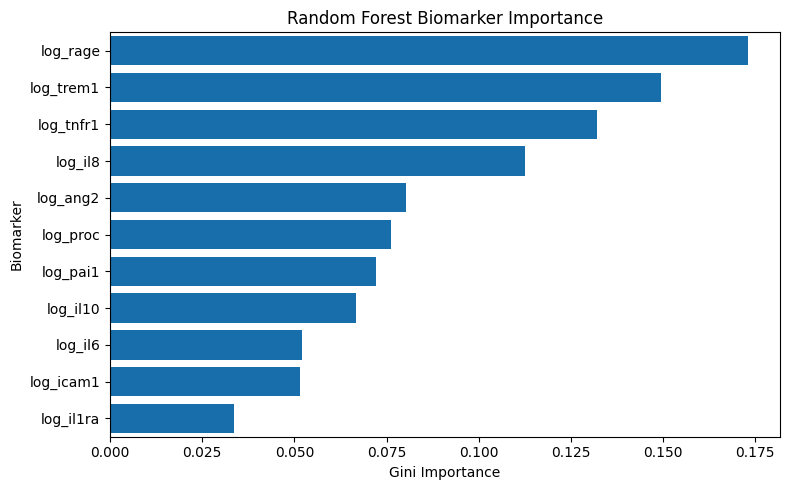

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/

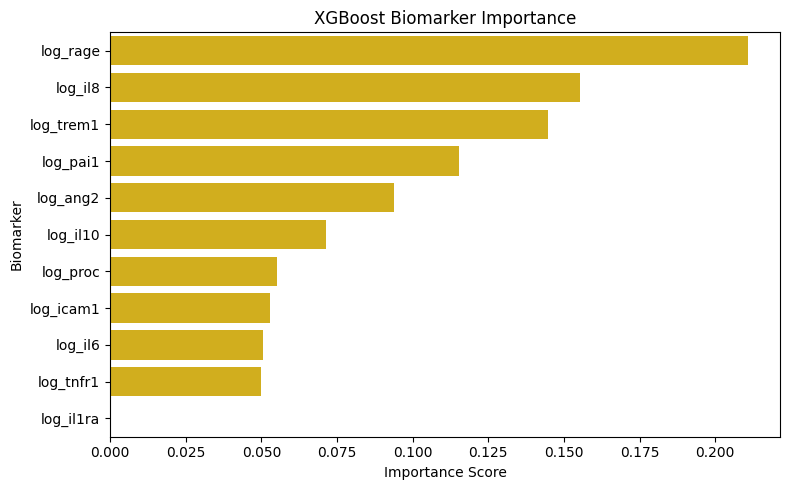

Top 5 Biomarkers (Random Forest):
    Biomarker  GiniImportance
7    log_rage        0.173058
10  log_trem1        0.149370
5   log_tnfr1        0.132207
4     log_il8        0.112445
1    log_ang2        0.080371

Top 5 Biomarkers (XGBoost):
    Biomarker  XGBImportance
7    log_rage       0.210879
4     log_il8       0.155361
10  log_trem1       0.144876
8    log_pai1       0.115360
1    log_ang2       0.093704


In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Define biomarker columns
biomarkers = [
    "log_il10", "log_ang2", "log_il6", "log_il1ra", "log_il8",
    "log_tnfr1", "log_proc", "log_rage", "log_pai1", "log_icam1",
    "log_trem1"
]

# Drop missing values for those columns and outcome
df_clean = df.dropna(subset=biomarkers + ["outcome"])

# Encode outcome (0 = Survived, 1 = Died)
y = LabelEncoder().fit_transform(df_clean["outcome"])
X = df_clean[biomarkers]

# Random Forest
rf = RandomForestClassifier(
    n_estimators=1000,
    max_leaf_nodes=10,
    max_features='sqrt',
    random_state=123
)

rf.fit(X, y)

# Get importance
rf_importance = pd.DataFrame({
    "Biomarker": X.columns,
    "GiniImportance": rf.feature_importances_
}).sort_values("GiniImportance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="GiniImportance", y="Biomarker", data=rf_importance, color="#0073C2FF")
plt.title("Random Forest Biomarker Importance")
plt.xlabel("Gini Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# XGBoost with cross-validation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 3, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=0
)

grid.fit(X, y)

# Best model
xgb_best = grid.best_estimator_

# Feature importance
xgb_importance = pd.DataFrame({
    "Biomarker": X.columns,
    "XGBImportance": xgb_best.feature_importances_
}).sort_values("XGBImportance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="XGBImportance", y="Biomarker", data=xgb_importance, color="#EFC000FF")
plt.title("XGBoost Biomarker Importance")
plt.xlabel("Importance Score")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

print("Top 5 Biomarkers (Random Forest):")
print(rf_importance.head(5))

print("\nTop 5 Biomarkers (XGBoost):")
print(xgb_importance.head(5))



Biomarker importance was ranked by Gini importance in RF and by gain in XGBoost. In the RF model, the top five biomarkers were RAGE, STREM-1, STNFR-1, IL-8, and ANG2. In the XGBoost model, the top features were RAGE, IL-8, STREM-1, PAI-1, and ANG2. These machine learning models supported the AUC-based findings, reinforcing the selection of STREM-1, STNFR-1, and IL-8 as the top-performing biomarkers for further evaluation. 

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, make_scorer
from tqdm import tqdm

# Recode 'outcome' column similar to your R code
df_clean['outcome'] = df_clean['outcome'].replace(['NA', 'Left AMA', 'Transferred'], 'Survived')
df_clean = df_clean[df_clean['outcome'].isin(['Died', 'Survived'])].copy()
df_clean['outcome'] = df_clean['outcome'].map({'Survived': 0, 'Died': 1})

# Define model combinations
models = {
    "LOD + sTREM-1": ["lods_score", "log_trem1"],
    "LOD + sTNFR-1": ["lods_score", "log_tnfr1"],
    "LOD + IL-8": ["lods_score", "log_il8"],
    "LOD + sTREM-1 + IL-8": ["lods_score", "log_trem1", "log_il8"],
    "LOD + sTREM-1 + sTNFR-1": ["lods_score", "log_trem1", "log_tnfr1"],
    "LOD + sTNFR-1 + IL-8": ["lods_score", "log_tnfr1", "log_il8"],
    "LOD + sTREM-1 + IL-8 + sTNFR-1": ["lods_score", "log_trem1", "log_il8", "log_tnfr1"],
    "qSOFA + sTREM-1": ["qSOFA", "log_trem1"],
    "qSOFA + sTNFR-1": ["qSOFA", "log_tnfr1"],
    "qSOFA + IL-8": ["qSOFA", "log_il8"],
    "qSOFA + sTREM-1 + IL-8": ["qSOFA", "log_trem1", "log_il8"],
    "qSOFA + sTREM-1 + sTNFR-1": ["qSOFA", "log_trem1", "log_tnfr1"],
    "qSOFA + sTNFR-1 + IL-8": ["qSOFA", "log_tnfr1", "log_il8"],
    "qSOFA + sTREM-1 + IL-8 + sTNFR-1": ["qSOFA", "log_trem1", "log_il8", "log_tnfr1"]
}

# CV and scoring setup
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=123)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

results = []

# Run models
for model_name, features in tqdm(models.items(), desc="Running models"):
    try:
        data = df_clean[features + ['outcome']].dropna()
        X = data[features]
        y = data['outcome']
        if len(y.unique()) < 2:
            raise ValueError("Not enough class variety")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(solver='liblinear'))
        ])

        aucs = cross_val_score(pipeline, X, y, scoring=auc_scorer, cv=cv, n_jobs=-1)

        results.append({
            "Model": model_name,
            "AUC_ROC": round(np.mean(aucs), 3),
            "95% Lower CI": round(np.percentile(aucs, 2.5), 3),
            "95% Upper CI": round(np.percentile(aucs, 97.5), 3)
        })

    except Exception:
        results.append({
            "Model": model_name,
            "AUC_ROC": np.nan,
            "95% Lower CI": np.nan,
            "95% Upper CI": np.nan
        })

# Final table
table3 = pd.DataFrame(results).sort_values(by="AUC_ROC", ascending=False).reset_index(drop=True)
print(table3)


/tmp/ipykernel_4087/1812745848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['outcome'] = df_clean['outcome'].replace(['NA', 'Left AMA', 'Transferred'], 'Survived')
Running models: 100%|██████████| 14/14 [00:00<00:00, 505.83it/s]

                               Model  AUC_ROC  95% Lower CI  95% Upper CI
0                      LOD + sTREM-1      NaN           NaN           NaN
1                      LOD + sTNFR-1      NaN           NaN           NaN
2                         LOD + IL-8      NaN           NaN           NaN
3               LOD + sTREM-1 + IL-8      NaN           NaN           NaN
4            LOD + sTREM-1 + sTNFR-1      NaN           NaN           NaN
5               LOD + sTNFR-1 + IL-8      NaN           NaN           NaN
6     LOD + sTREM-1 + IL-8 + sTNFR-1      NaN           NaN           NaN
7                    qSOFA + sTREM-1      NaN           NaN           NaN
8                    qSOFA + sTNFR-1      NaN           NaN           NaN
9                       qSOFA + IL-8      NaN           NaN           NaN
10            qSOFA + sTREM-1 + IL-8      NaN           NaN           NaN
11         qSOFA + sTREM-1 + sTNFR-1      NaN           NaN           NaN
12            qSOFA + sTNFR-1 + IL-8  

In [64]:
# Check what the actual unique values in 'outcome' are and count NaNs in relevant columns
outcome_unique = df_clean['outcome'].unique()
outcome_counts = df_clean['outcome'].value_counts(dropna=False)

# Check for NaNs in columns used in model combinations
required_columns = set(sum([
    ["lods_score", "log_trem1"],
    ["lods_score", "log_tnfr1"],
    ["lods_score", "log_il8"],
    ["qSOFA", "log_trem1"],
    ["qSOFA", "log_tnfr1"],
    ["qSOFA", "log_il8"]
], []))  # Flattened list of required features

required_columns.add("outcome")
nan_counts = df_clean[list(required_columns)].isna().sum()
non_null_rows = df_clean[list(required_columns)].dropna().shape[0]

print("Unique values in outcome:", outcome_unique)
print("\nOutcome value counts:\n", outcome_counts)
print("\nMissing values in required columns:\n", nan_counts)
print("\nNumber of complete rows (no NaNs):", non_null_rows)


Unique values in outcome: [0, 1]
Categories (2, int64): [1, 0]

Outcome value counts:
 outcome
0    315
1     62
Name: count, dtype: int64

Missing values in required columns:
 qSOFA         0
log_il8       0
log_tnfr1     0
outcome       0
log_trem1     0
lods_score    0
dtype: int64

Number of complete rows (no NaNs): 377
